Exercise Time
=============

We're going to put our little bit of knowledge to use and try to see if we can't mine some data out of a dataset.  I'll give you the code to read in the file and a few questions, and you will create a notebook to try to complete them.

This message will self-destruct in 30 seconds.

We're going to load up some data from the FBI UCR (Uniform Crime Reporting) dataset.  The following CSV file that is being loaded is adapted from [this page](https://ucr.fbi.gov/crime-in-the-u.s/2016/crime-in-the-u.s.-2016/tables/table-6/table-6-state-cuts/new-jersey.xls).

In [13]:
import pandas as pd

df = pd.read_csv('new-jersey-crime.csv', header=0, index_col=0)

df

,Population,Violent Crime,Murder,Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny-theft,Motor Vehicle Theft,Arson
City,,,,,,,,,,,
Aberdeen Township,18562,18,0,2,5,11,147,33,106,8,0
Absecon,8298,8,0,0,2,6,242,33,203,6,0
Allendale,6849,1,0,0,0,1,37,9,26,2,0
Allenhurst,490,0,0,0,0,0,16,1,15,0,0
Allentown,1824,1,0,0,0,1,9,3,6,0,0
Alpha,2291,1,0,0,0,1,15,3,11,1,1
Alpine,1918,0,0,0,0,0,9,2,6,1,0
Andover Township,5979,6,0,0,0,6,35,2,29,4,0
Asbury Park,15757,223,2,7,101,113,723,145,557,21,4


Question 1
----------

What are the totals for each category of crime?

In [2]:
df.sum()

Population             8580636
Violent Crime            19098
Murder                     306
Rape                      1260
Robbery                   8044
Aggravated Assault        9488
Property Crime          127458
Burglary                 23282
Larceny-theft            93644
Motor Vehicle Theft      10532
Arson                      459
dtype: int64

Question 2
----------

What is the arson rate for each city? (per 1000 citizens)

In [6]:
arson_series = 1000 * df['Arson'] / df['Population']
arson_series[arson_series > 0.2]

City
Alpha                        0.436491
Asbury Park                  0.253855
Beverly                      0.391389
Bridgeton                    0.200144
Buena                        0.221239
Carney's Point Township      0.256115
Clementon                    0.203542
Delaware Township            0.223314
Haddon Heights               0.267308
Hamburg                      0.638774
High Bridge                  0.282646
Irvington                    0.312328
Keansburg                    0.203500
Lavallette                   0.558971
Merchantville                0.799787
Middle Township              0.215575
Mount Ephraim                0.216967
National Park                0.336134
New Brunswick                0.262430
Newton                       0.251572
North Arlington              0.251240
Oaklyn                       0.252334
Peapack and Gladstone        0.384172
Pemberton Borough            0.725689
Pemberton Township           0.324453
Pennsauken Township          0.254223
Penns G

Question 3
----------

How does the violent crime rate corrolate to the property crime rate?

In [17]:
coor_df = df[['Violent Crime', 'Property Crime', 'Population']].copy()

coor_df['Violent Crime Rate'] = coor_df['Violent Crime'] / coor_df['Population']
coor_df['Property Crime Rate'] = coor_df['Property Crime'] / coor_df['Population']

coor_df['Violent Crime Rate'].corr(coor_df['Property Crime Rate'])

0.5283327181270734

Question 4
----------

Split your data into 4 equal sized cohorts by population (hint:  check out `qcut`).  How do the crime rates of each cohort compare?

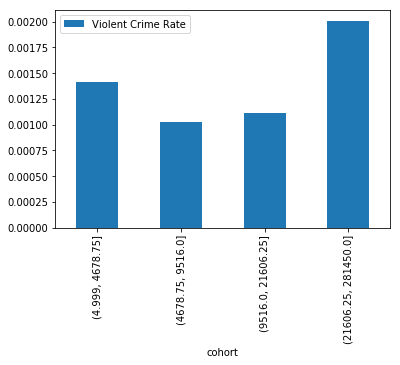

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

cohort_df = df
cohort_df['cohort'] = pd.qcut(df['Population'], 4)

cohort_df['Violent Crime Rate'] = cohort_df['Violent Crime'] / cohort_df['Population']
cohort_df = cohort_df[['cohort', 'Violent Crime Rate']]

cohort_df = cohort_df.groupby('cohort').mean()
cohort_df.plot(kind='bar')